<a href="https://colab.research.google.com/github/Romeolive/Class-11B/blob/master/Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Reshape, Flatten, BatchNormalization, Dropout, Input

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Bash
!unzip /content/drive/MyDrive/train.zip
!rm -rf train/.DS_Store

In [3]:
#import os
#from tqdm import tqdm
#from keras import layers, models

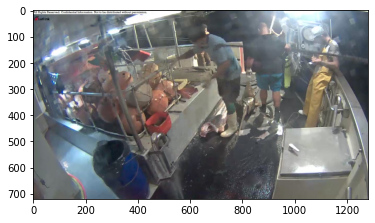

In [ ]:
folder = 'train/OTHER'
files = os.listdir(folder)
img = plt.imread(folder + '/' + files[0])
plt.figure()
plt.imshow(img)

In [ ]:
classes = {cls: i for i, cls in enumerate(os.listdir('train')[:8])}
print(classes)

x_train, y_train = [], []
for cls in classes:
  for file in tqdm(os.listdir(os.path.join('train', cls))):
    img = plt.imread(os.path.join('train', cls, file))
    img = resize(img, (28, 28))
    x_train.append(img)
    y_train.append(classes[cls])

x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = to_categorical(y_train)
print(x_train.shape, y_train.shape)

{'LAG': 0, 'NoF': 1, 'BET': 2, 'ALB': 3, 'SHARK': 4, 'YFT': 5, 'DOL': 6, 'OTHER': 7}


100%|██████████| 299/299 [03:05<00:00,  1.61it/s]

(3777, 28, 28, 3) (3777, 8)


In [ ]:
np.savez('/content/drive/MyDrive/28_28_fish', x=x_train, y=y_train)

In [2]:
file = np.load('/content/drive/MyDrive/data.npz')

In [3]:
x_train = file['x']
y_train = file['y']


x_train = np.array(x_train)
y_train = np.array(y_train)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15)

print(x_train.shape, y_train.shape)

(3210, 224, 224, 3) (3210, 8)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15)

(3210, 224, 224, 3) (3210, 8, 2)


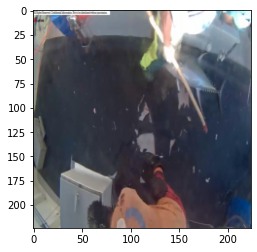

In [8]:
plt.imshow(x_train[0])

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [5]:
model = Sequential()

model.add(Input((224, 224, 3)))
model.add(Conv2D(16, 3, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
    
model.add(Flatten())
    
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(9))
model.add(Dense(8, activation="softmax"))   

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.fit(
    x_train, y_train, 
    shuffle=True, 
    validation_data=(x_test, y_test), 
    epochs=6
)

Epoch 1/6
86/86 [==============================] - 18s 60ms/step - loss: 1.4047 - accuracy: 0.6078 - val_loss: 2.6668 - val_accuracy: 0.0415
Epoch 2/6
86/86 [==============================] - 4s 44ms/step - loss: 0.6593 - accuracy: 0.8196 - val_loss: 2.0033 - val_accuracy: 0.3963
Epoch 3/6
86/86 [==============================] - 4s 47ms/step - loss: 0.3351 - accuracy: 0.9168 - val_loss: 1.6186 - val_accuracy: 0.5166
Epoch 4/6
86/86 [==============================] - 4s 44ms/step - loss: 0.2319 - accuracy: 0.9450 - val_loss: 0.9690 - val_accuracy: 0.6058
Epoch 5/6
86/86 [==============================] - 4s 43ms/step - loss: 0.1057 - accuracy: 0.9776 - val_loss: 0.6536 - val_accuracy: 0.7656
Epoch 6/6
86/86 [==============================] - 4s 46ms/step - loss: 0.0682 - accuracy: 0.9875 - val_loss: 0.2439 - val_accuracy: 0.9315


In [ ]:
y_new = model.predict(x_train)